
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


## Load the data into a DataFrame
#file_path = ('/Users/chaimgluck/Downloads/Iowa_Liquor_sales_sample_10pct.csv')
file_path = ('/Users/chaimgluck/Downloads/Iowa_Liquor_sales_reduced.csv')
df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [2]:
# Change values in these columns to float.
cols_to_float = ['state_bottle_cost', 'state_bottle_retail', 'sale_dollars'] 
for col in ILS[cols_to_float]:
    ILS[col] = ILS[col].replace('[\$,]','', regex=True).astype(float)

In [3]:
# Drop duplicate rows.
ILS.drop_duplicates(inplace=True)

In [4]:
# New DF of all dates in 2015.
ILS_2015 = ILS[ILS['date'].dt.year == 2015]

# New DF of all dates in 2016.
ILS_2016 = ILS[ILS['date'].dt.year == 2016]

# New DF of all dates from January through March of 2015.
ILS_2015_Q1 = ILS_2015[ILS_2015['date'].dt.month < 4]
ILS_2015_Q1.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
2212926,2015-03-31,2508,CEDAR RAPIDS,52405,57.0,Linn,1031080.0,VODKA 80 PROOF,260,37426,Popov Vodka 80 Prf Traveler,750,4.50,6.75,12,81.00,9.00,2.38
2212927,2015-03-31,3942,TOLEDO,52342,86.0,Tama,1022100.0,TEQUILA,65,88540,Hornitos Lime Shot,750,13.64,20.46,3,61.38,2.25,0.59
2212928,2015-03-31,4252,MONTICELLO,52310,53.0,Jones,1062310.0,SPICED RUM,260,43336,Captain Morgan Original Spiced,750,9.00,13.50,1,13.50,0.75,0.20
2212929,2015-03-31,2562,FORT DODGE,50501,94.0,Webster,1032080.0,IMPORTED VODKA,260,34456,Ketel One Imported Vodka,750,14.00,21.00,12,252.00,9.00,2.38
2212930,2015-03-31,2649,DUBUQUE,52001,31.0,Dubuque,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38


In [5]:
print 'Total Sales 2015 Q1:',ILS_2015_Q1.sale_dollars.sum()
print 'Total Sales 2015:',ILS_2015.sale_dollars.sum()
print 'Total Sales 2016 Q1:',ILS_2016.sale_dollars.sum()

Total Sales 2015 Q1: 62922522.31
Total Sales 2015: 283944590.039
Total Sales 2016 Q1: 65449030.37


In [ ]:
store_in_county = ILS_2015.groupby(('store_number', 'county')).agg({'sale_dollars':'sum'})#.sort_values(ascending=False)

In [ ]:
store_in_county.groupby('county').sum().sort_values('sale_dollars',ascending=False)

In [7]:
ils_by_store = pd.DataFrame(ILS_2015_Q1.groupby('store_number')['sale_dollars'].mean())
ils_by_store.columns = ['mean_sale_dollars_q1_2015']
ils_by_store['total_sales_q1_2015'] = ILS_2015_Q1.groupby('store_number')['sale_dollars'].sum()
ils_by_store['total_sales_2015'] = ILS_2015.groupby('store_number').sum()['sale_dollars']
ils_by_store['mean_sales_q1_2016'] = ILS_2016.groupby('store_number').sale_dollars.mean()
ils_by_store['total_sales_q1_2016'] = ILS_2016.groupby('store_number').sale_dollars.sum()
ils_by_store['county'] = ILS.county
ils_by_store['category'] = ILS.category_name

In [8]:
ils_by_store.groupby('category').sum().sort_values('total_sales_2015', ascending=False)

,mean_sale_dollars_q1_2015,total_sales_q1_2015,total_sales_2015,mean_sales_q1_2016,total_sales_q1_2016
category,,,,,
VODKA 80 PROOF,23914.619017,9184294.60,42090232.13,22823.846807,9507120.15
CANADIAN WHISKIES,15091.202038,6407606.93,27269262.04,14160.390040,6130339.80
WHISKEY LIQUEUR,10013.441790,5212727.76,22136009.64,9400.060767,5196940.61
IRISH WHISKIES,3956.643378,4210995.84,18106369.80,3883.710697,4547684.42
STRAIGHT BOURBON WHISKIES,7057.279299,3712405.62,16549673.23,7068.078830,3807822.69
TEQUILA,8033.932459,3535946.26,14558477.93,7314.892852,3107934.76
VODKA FLAVORED,7608.930582,2946031.12,13703919.66,6945.993928,3158723.95
AMERICAN GRAPE BRANDIES,7505.724096,2959872.33,12273086.68,5881.357283,2495646.55
SPICED RUM,7078.210282,2698341.45,12201573.47,6710.180012,2817220.67


In [ ]:
#q1_by_store['mean_bottle_volume_ml'] = ils_by_store_group.describe()['bottle_volume_ml']['mean']

### 110 Stores in 2015 but not in Q1. Will have to remove them from new DF

In [9]:
ils_by_store.dropna(inplace=True)
ils_by_store.isnull().sum()

mean_sale_dollars_q1_2015    0
total_sales_q1_2015          0
total_sales_2015             0
mean_sales_q1_2016           0
total_sales_q1_2016          0
county                       0
category                     0
dtype: int64

In [ ]:
ils_by_store.head()

In [10]:
print ils_by_store['total_sales_q1_2015'].shape
print ils_by_store['total_sales_2015'].shape
print ils_by_store['total_sales_q1_2016'].shape

(1181,)
(1181,)
(1181,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

/Users/chaimgluck/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Train Test Split

In [12]:
X = ils_by_store.total_sales_q1_2015
y = ils_by_store.total_sales_2015
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### StatsModels

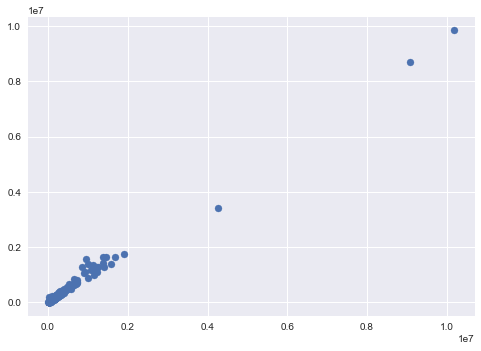

6779278006.38


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_sales_2015   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 2.963e+04
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        03:20:44   Log-Likelihood:                -10320.
No. Observations:                 826   AIC:                         2.064e+04
Df Residuals:                     824   BIC:                         2.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7294.6938   2548.837      2.862      0.004    2291.717    1.23e+04
total_sales_q1_2015     4.3564      0.025    172.131      0.000       4.307       4.406
==============================================================================
Omnibus:                      756.996   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           284713.242
Skew:                           3.238   Prob(JB):                         0.00
Kurtosis:                      93.723   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

plt.scatter(predictions, y_test)
plt.show()

print metrics.mean_squared_error(y_test, predictions)
model.summary()

### Statsmodels with mean sales

In [ ]:
X = ils_by_store.iloc[:, [0,1]]
y = ils_by_store.total_sales_2015
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

plt.scatter(predictions, y_test)
plt.show()

print metrics.mean_squared_error(y_test, predictions)
model.summary()

### SKLearn LinReg

In [ ]:
lr = LinearRegression()
X = ils_by_store["total_sales_q1_2015"].to_frame()
y = ils_by_store["total_sales_2015"].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print model.score(X_test,y_test)
print metrics.mean_squared_error(y_test, predictions)

### SKLearn LinReg with mean sales

In [ ]:
lr = LinearRegression()
X = ils_by_store.iloc[:, [0,1]]
y = ils_by_store["total_sales_2015"].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print model.score(X_test, y_test)
print metrics.mean_squared_error(y_test, predictions)

In [ ]:
lr = LinearRegression()
X = ils_by_store.iloc[:, [0,1]]
y = ils_by_store.iloc[:, 2]   #["total_sales_2015"]
X2 = ils_by_store.iloc[:, 4]     #["total_sales_q1_2016"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = lr.fit(X, y)
predictions_2016 = model.predict(X2)
plt.scatter(y, predictions_2016)
plt.show()
print model.score(X2,y)
print metrics.mean_squared_error(y, predictions_2016)

In [ ]:
X_2016_sales = ils_by_store.total_sales_q1_2016.to_frame()
X = ils_by_store.total_sales_q1_2015
y = ils_by_store.total_sales_2015
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = sm.OLS(y_train, X_train).fit()
predictions_2016 = model.predict(X_2016_sales)

plt.scatter(predictions_2016, y)
plt.show()

model.summary()
metrics.mean_squared_error(y, predictions_2016)

# Fit model on 2016

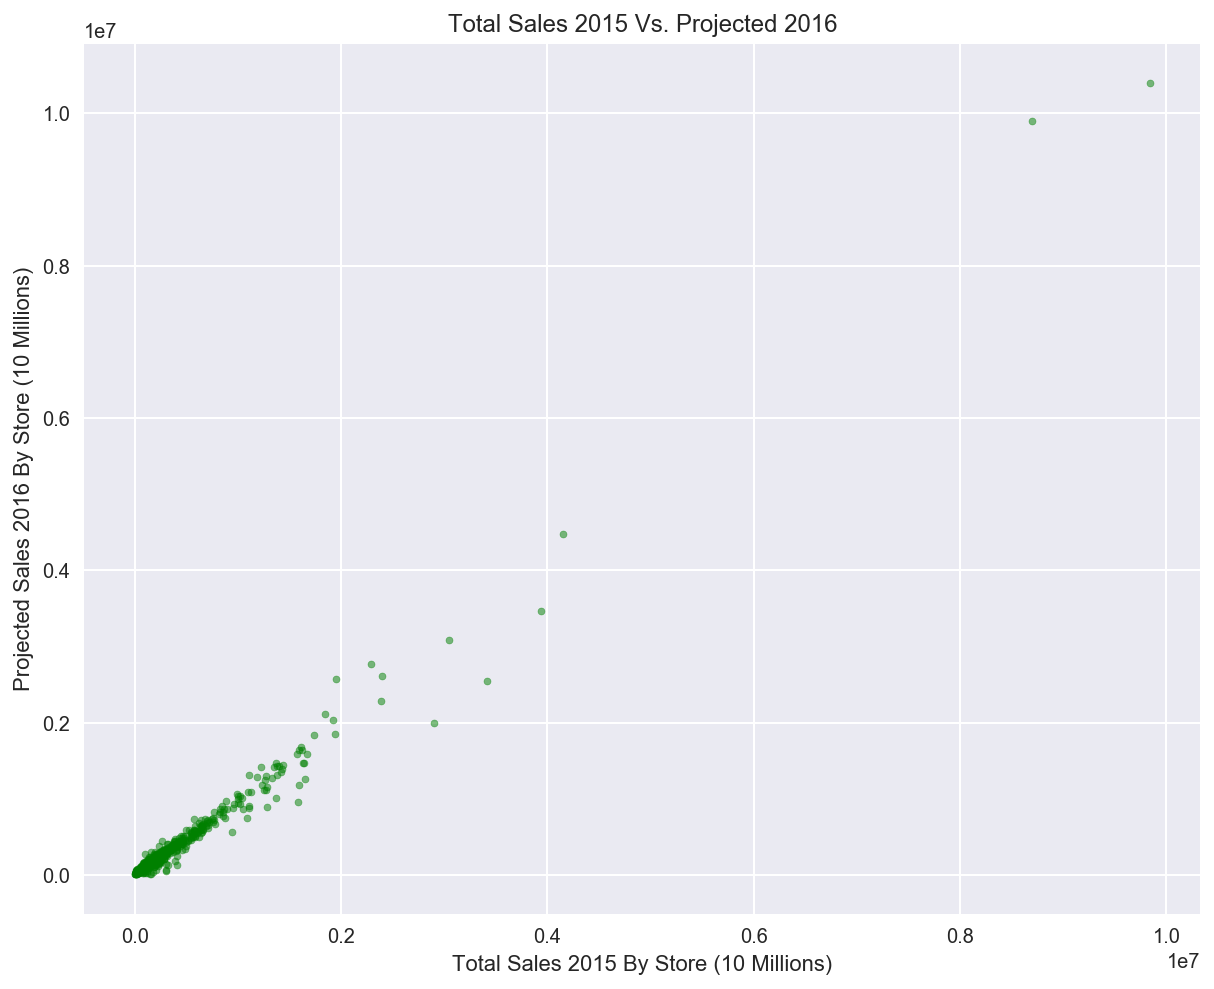

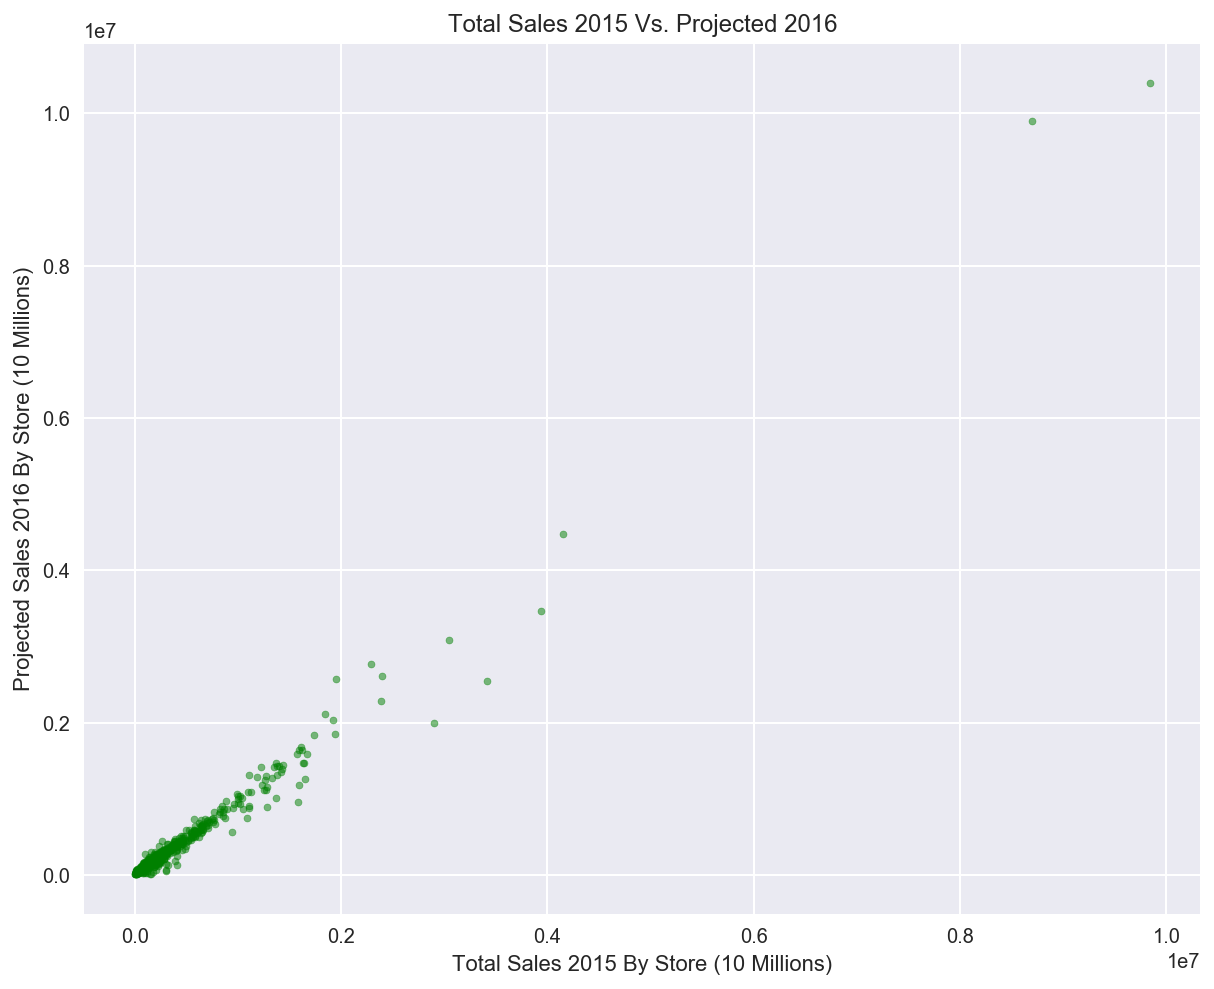

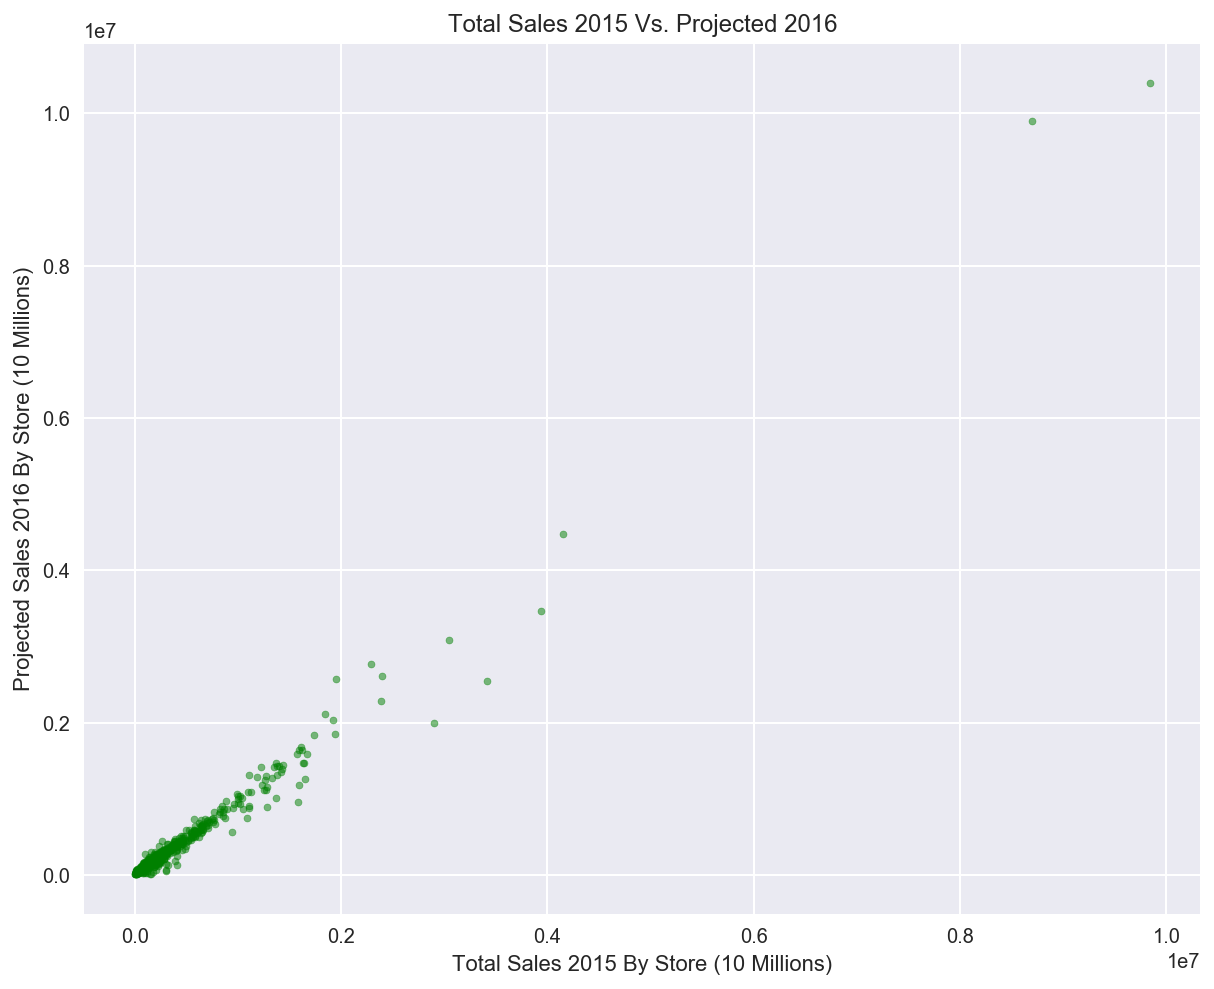

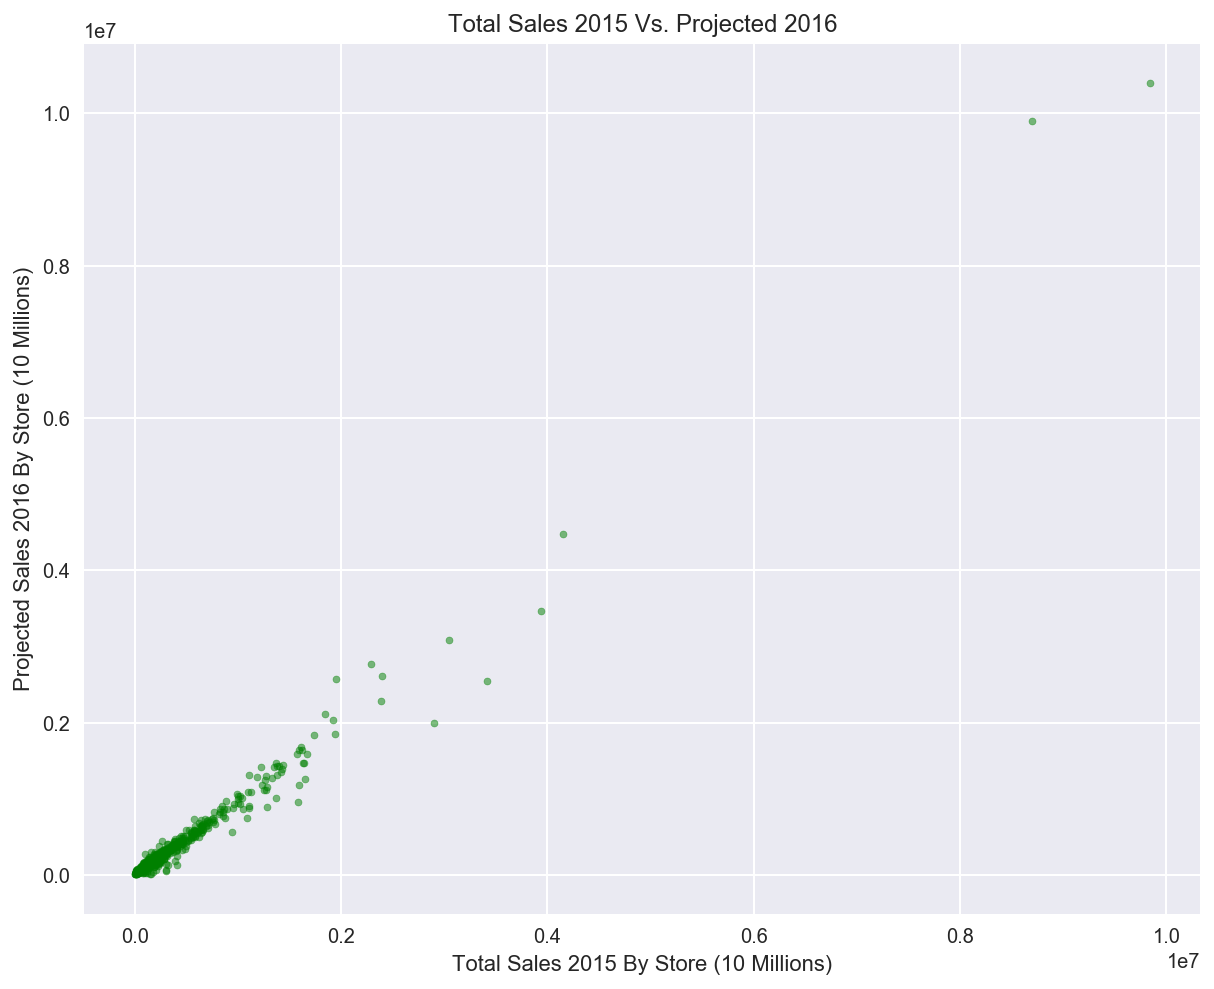

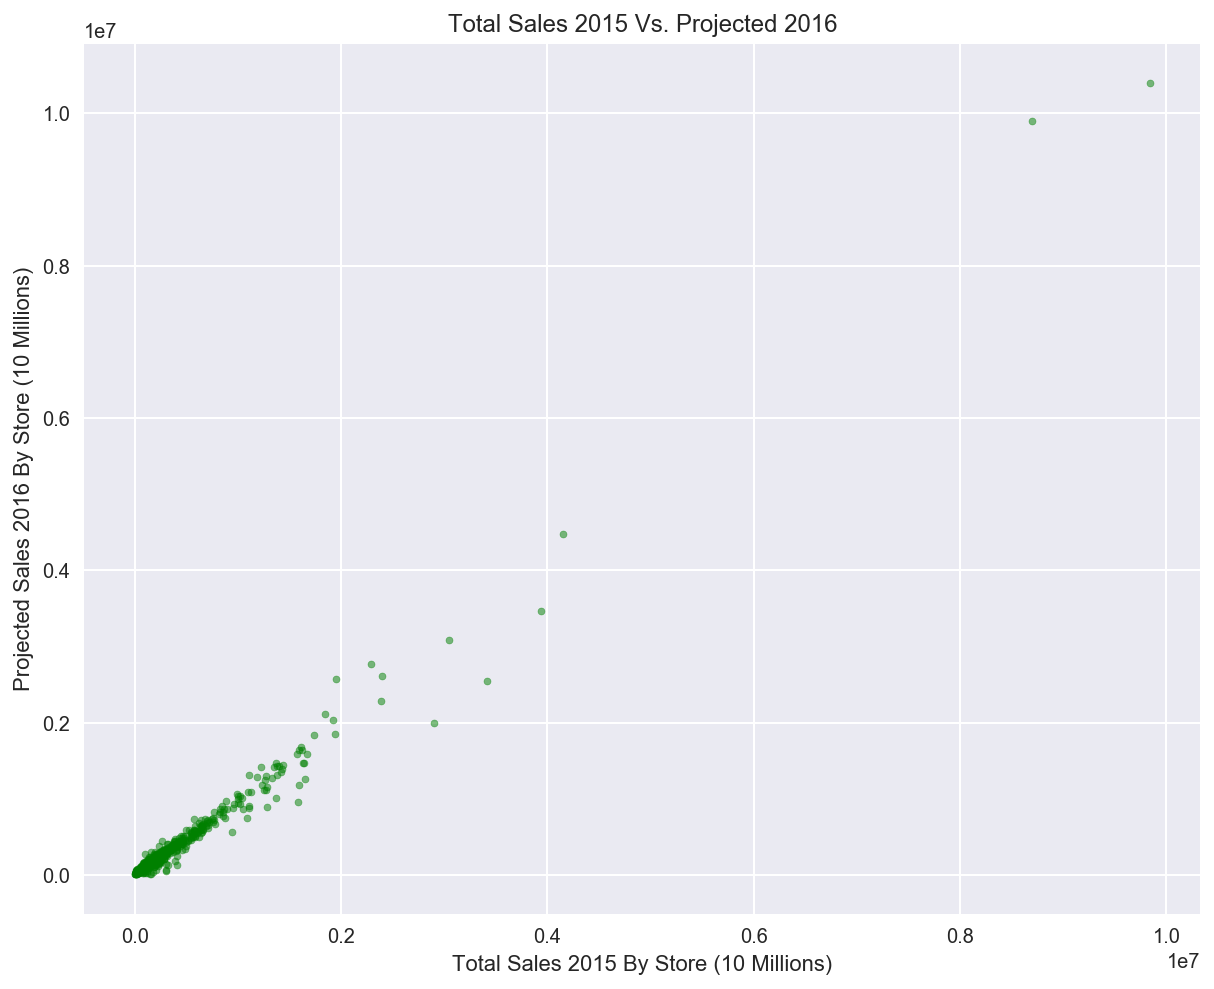

In [75]:
X = ils_by_store.total_sales_q1_2015
y = ils_by_store.total_sales_2015
X = sm.add_constant(X)
X2 = ils_by_store.total_sales_q1_2016
X2 = sm.add_constant(X2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = sm.OLS(y, X).fit()
predictions = model.predict(X2)

plt.figure(figsize=(10,8))
plt.scatter(x=y, y=predictions, c='green', marker='.', zorder=10, alpha=0.5)
plt.title('Total Sales 2015 Vs. Projected 2016')
plt.xlabel('Total Sales 2015 By Store (10 Millions)')
plt.ylabel('Projected Sales 2016 By Store (10 Millions)')
plt.xlim
plt.ylim
plt.savefig('plot.png')
plt.show()

#print metrics.mean_squared_error(y, predictions)
#model.summary()

In [ ]:
print predictions.sort_values(ascending=False)

In [15]:
predictions.sum()

278723764.37416744

In [16]:
ils_by_store.total_sales_2015.sum()

271418191.2200004

In [17]:
print 'Projected Sales for 2016:',predictions.sum()

Projected Sales for 2016: 278723764.374


In [18]:
(281855242.2466851-274787173.2100004)/274787173.2100004*100

2.5721975862690893

In [19]:
ils_by_store['projected_sales_2016'] = predictions

In [ ]:
ILS.county.nunique()

In [20]:
top_counties = ils_by_store.groupby('county').projected_sales_2016.sum().sort_values(ascending=False).to_frame()

In [21]:
top_categories = ils_by_store.groupby('category').projected_sales_2016.sum().sort_values(ascending=False).to_frame()

In [46]:
top_counties_2015 = ils_by_store.groupby('county').total_sales_2015.sum().sort_values(ascending=False).to_frame()
top_categories_2015 = ils_by_store.groupby('category').total_sales_2015.sum().sort_values(ascending=False).to_frame()

In [48]:
top_categories_2015

,total_sales_2015
category,
VODKA 80 PROOF,41717398.11
CANADIAN WHISKIES,25776968.78
WHISKEY LIQUEUR,21936488.23
IRISH WHISKIES,18106369.80
STRAIGHT BOURBON WHISKIES,16415100.43
TEQUILA,14161961.97
VODKA FLAVORED,13460233.26
SPICED RUM,12168951.89
AMERICAN GRAPE BRANDIES,12105952.33


In [ ]:
county = []
county_sales_2015 = []
category = []
category_sales_2015 = []

for entry in top_counties.index[0:5]:
    county.append(entry)
                  
for item in top_counties.projected_sales_2016.values[0:5]:
    county_sales.append(item)
    
for 
                  
for entry in top_categories.index[0:5]:
    category.append(entry)
                
for item in top_categories.projected_sales_2016.values[0:5]:
    category_sales.append(item)
                  
print county
print county_sales
print category
print category_sales

top_sellers = pd.DataFrame(zip(county, county_sales, category, category_sales))
top_sellers.columns = ['county', 'county_sales', 'category', 'category_sales']
top_sellers

In [55]:
county = []
county_sales = []
county_sales_2015 = []
category = []
category_sales = []
category_sales_2015 = []

for entry in top_counties.index[0:5]:
    county.append(entry)
                  
for item in top_counties.projected_sales_2016.values[0:5]:
    county_sales.append(item)
                  
for item in top_counties_2015.total_sales_2015[0:5]:
    county_sales_2015.append(item)
        
for entry in top_categories.index[0:5]:
    category.append(entry)
                
for item in top_categories.projected_sales_2016.values[0:5]:
    category_sales.append(item)

for item in top_categories_2015.total_sales_2015.values[0:5]:
    category_sales_2015.append(item)
                  
print county
print county_sales
print county_sales_2015
print category
print category_sales
print category_sales_2015


top_sellers = pd.DataFrame(zip(county, county_sales_2015, county_sales, category, 
                               category_sales_2015, category_sales))
top_sellers.columns = ['county', 'county_sales_2015', 'county_sales_2016_projected', 
                       'category', 'category_sales_2015', 'category_sales_2016_projected']
top_sellers

['Polk', 'Cerro Gordo', 'Scott', 'Black Hawk', 'Clinton']
[85030978.87507531, 55111043.145776741, 50902237.249473579, 33905037.510605849, 14296222.614744198]
[81304180.620000228, 55682855.490000315, 52494872.300000168, 32005308.56000001, 13334562.960000025]
['VODKA 80 PROOF', 'CANADIAN WHISKIES', 'WHISKEY LIQUEUR', 'IRISH WHISKIES', 'STRAIGHT BOURBON WHISKIES']
[42331893.844385214, 26500116.861728895, 22881315.265453737, 19630869.593192436, 16830679.904863741]
[41717398.110000059, 25776968.780000065, 21936488.230000176, 18106369.799999803, 16415100.430000076]


,county,county_sales_2015,county_sales_2016_projected,category,category_sales_2015,category_sales_2016_projected
0,Polk,81304180.62,8.503098e+07,VODKA 80 PROOF,41717398.11,4.233189e+07
1,Cerro Gordo,55682855.49,5.511104e+07,CANADIAN WHISKIES,25776968.78,2.650012e+07
2,Scott,52494872.30,5.090224e+07,WHISKEY LIQUEUR,21936488.23,2.288132e+07
3,Black Hawk,32005308.56,3.390504e+07,IRISH WHISKIES,18106369.80,1.963087e+07
4,Clinton,13334562.96,1.429622e+07,STRAIGHT BOURBON WHISKIES,16415100.43,1.683068e+07


## Projected Sales Increase for 2016
About 2.6%

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [ ]:
ils_by_store.info()

In [ ]:
cols_to_heatmap = ['mean_sale_dollars_q1_2015', 'total_sales_q1_2015', 'total_sales_2015', 'mean_sales_q1_2016',
                  'total_sales_q1_2016']
cols_to_heatmap2 = ['sale_dollars', 'state_bottle_retail']

In [ ]:
sns.heatmap(ils_by_store[cols_to_heatmap])
plt.show()

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

## Executive Summary: The Iowa Liquor Dataset

#### Problem Statement: 
You, the Iowa Tax Board, have given us a vast dataset filled with rows of numbers that may each mean something individually, but refuse to add up to any concrete ideas. We will translate the data into actionable insights that you can use to inform your decision-making process.
#### Methodologies:
A quick description of our process. Please welcome Python. Python is a powerful, robust, flexible, and friendly programming language. That's right, I said friendly. It's easy syntax makes it a popular language for beginners and it's unending malleability endears it to experts. Everything we do for this project will be using the framework of Python.

First, we load the data into a Pandas Dataframe. Pandas is a Python library that gives us the ability to easily and flexibly manipulate and perform operations on large sets of data. For comparison, Excel only allows you to use 1,048,576 rows. Pandas is only limited by the memory capacity of your computer. 

After we've prodded, pushed, and coaxed the data into the form we need it, we come to the most strategic aspect of the process, building a model. A model is how we describe the relationship between the information we have and that which we seek to predict. We have to decide which variables we have (or can create) will most accurately and effectively model that relationship.  

For this model, we'll use Linear Regression. Linear Regression is a relatively simplistic and very common model. It essentially uses math to create a line that best describes the relationship between the variables. Then, when we obtain new data, that line will give us an estimate of where they should fall.

We'll use train-test-split and cross-validation to ensure that each portion of the range of our data has a similar spread. 
#### Findings: 
- Sales are projected to rise about 2.6% in 2016 over 2015. 
- Many of the sales are contained within the most populous counties. 
- There are a few stores that buy far more than any of the others.
- The top-selling categories of liquor make up a fair portion of the sales. 
#### Conclusions:
- There are opportunities to increase revenue by leveraging the volume of certain categories or accounts.
- The dataset contains a wealth of information, both in the macro and in the micro. For example, this data can be used to streamline the distribution and shipping of the liquor, because we can use it to estimate the coming orders. Also, a single store could use this dataset to optimize its own sales strategy. 
#### Next Steps:
This data is a valuable resource. It can be used to develop many unique and interesting strategies. Using the process we outlined above, my team can scrape this dataset for all the insight it contains. We can transform it from millions of rows of gibberish into clear, actionable plans and strategies. We look forward to working together with you on this project.    
## Thank You!